# Regression on a given dataset

The objective of this notebook is to perform a comparative regression analysis on a given dataset, using at least two different methods. The performance target is to achieve an R² score greater than 0.88 on the test set, knowing that the Bayes estimator reaches approximately 0.92.

## 1. Data Loading and Exploration

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

# Data loading
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy").ravel()
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy").ravel()

print("DATASET INFORMATION\n")
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

DATASET INFORMATION

X_train dimensions: (200, 200)
y_train dimensions: (200,)
X_test dimensions: (200, 200)
y_test dimensions: (200,)
Number of features: 200
Number of training samples: 200
Number of test samples: 200


### Data Analysis

In [13]:
# Statistics
print("STATISTICS\n")
print(f"y_train - Min: {y_train.min():.4f}, Max: {y_train.max():.4f}, Mean: {y_train.mean():.4f}, Std: {y_train.std():.4f}")
print(f"y_test - Min: {y_test.min():.4f}, Max: {y_test.max():.4f}, Mean: {y_test.mean():.4f}, Std: {y_test.std():.4f}")

# Feature analysis
print(f"\nX_train - Min: {X_train.min():.4f}, Max: {X_train.max():.4f}, Mean: {X_train.mean():.4f}, Std: {X_train.std():.4f}")
print(f"X_test - Min: {X_test.min():.4f}, Max: {X_test.max():.4f}, Mean: {X_test.mean():.4f}, Std: {X_test.std():.4f}")

STATISTICS

y_train - Min: 1.9300, Max: 7.4648, Mean: 4.9068, Std: 0.9454
y_test - Min: 2.2818, Max: 7.4820, Mean: 5.0649, Std: 0.8580

X_train - Min: 0.0000, Max: 1.0000, Mean: 0.4984, Std: 0.2893
X_test - Min: 0.0000, Max: 1.0000, Mean: 0.4993, Std: 0.2891


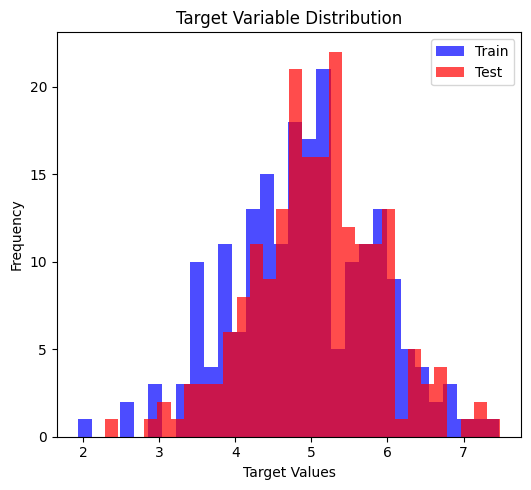

FEATURE ANALYSIS

Average feature variance: 0.0832
Maximum feature variance: 0.1000
Minimum feature variance: 0.0689


In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, alpha=0.7, color='blue', label='Train')
plt.hist(y_test, bins=30, alpha=0.7, color='red', label='Test')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Target Variable Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Feature analysis
print(f"FEATURE ANALYSIS\n")
print(f"Average feature variance: {np.var(X_train, axis=0).mean():.4f}")
print(f"Maximum feature variance: {np.var(X_train, axis=0).max():.4f}")
print(f"Minimum feature variance: {np.var(X_train, axis=0).min():.4f}")

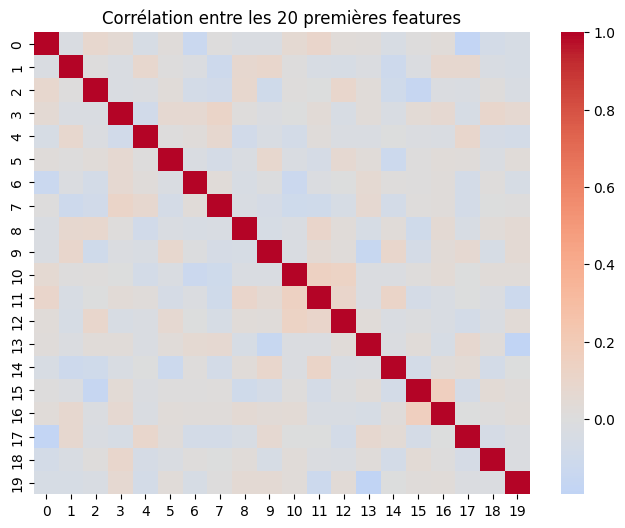

In [22]:
corr_matrix = np.corrcoef(X_train[:,:20].T)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Corrélation entre les 20 premières features")
plt.show()

## 2. Data Preprocessing

Before model training, the features are standardized using a StandardScaler. This step is crucial for algorithms like Ridge and Lasso regression, which are sensitive to the scale of the input variables. Standardization ensures that each feature contributes equally to the model training.

In [16]:
# Data standardization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Model Training

Two regularized linear regression methods are applied:
- Ridge Regression (L2 penalty): This method helps to handle multicollinearity and prevents overfitting by shrinking the coefficients.

In [17]:
# Ridge Regression

print("RIDGE REGRESSION\n")
ridge_params = {'alpha': np.logspace(-3, 2, 10)}
ridge = Ridge(random_state=42)
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']:.6f}")
print(f"Ridge validation R² score: {ridge_cv.best_score_:.6f}")
print(f"Ridge CV standard deviation: {ridge_cv.cv_results_['std_test_score'][ridge_cv.best_index_]:.6f}")

RIDGE REGRESSION



Best Ridge alpha: 7.742637
Ridge validation R² score: 0.568954
Ridge CV standard deviation: 0.136057


- Lasso Regression (L1 penalty): In addition to regularization, Lasso can perform feature selection by driving some coefficients to zero.

In [18]:
# Lasso Regression

print("LASSO REGRESSION\n")
lasso_params = {'alpha': np.logspace(-3, 2, 10)}
lasso = Lasso(max_iter=5000, random_state=42)
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']:.6f}")
print(f"Lasso validation R² score: {lasso_cv.best_score_:.6f}")
print(f"Lasso CV standard deviation: {lasso_cv.cv_results_['std_test_score'][lasso_cv.best_index_]:.6f}")

LASSO REGRESSION

Best Lasso alpha: 0.012915
Lasso validation R² score: 0.921578
Lasso CV standard deviation: 0.017247


For both Ridge and Lasso regression models, hyperparameter tuning was performed using GridSearchCV, which systematically tests multiple values of the regularization parameter αα to identify the optimal setting for each model. This grid search approach helps prevent overfitting and ensures that the chosen model generalizes well to unseen data.

## 4. Evaluation

The models are evaluated on the test set using the R² score and Mean Squared Error (MSE). The goal is to achieve an R² above 0.88, which only the lasso regression model successfully reachs.

In [19]:
# Ridge evaluation on test set
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'], random_state=42)
ridge_best.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Lasso evaluation on test set
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=5000, random_state=42)
lasso_best.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_best.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [20]:
print("TEST SET RESULTS\n")
print(f"Ridge - R² Score: {r2_ridge:.6f}")
print(f"Ridge - MSE: {mse_ridge:.6f}")
print(f"Ridge - RMSE: {np.sqrt(mse_ridge):.6f}")

print(f"\nLasso - R² Score: {r2_lasso:.6f}")
print(f"Lasso - MSE: {mse_lasso:.6f}")
print(f"Lasso - RMSE: {np.sqrt(mse_lasso):.6f}")

TEST SET RESULTS

Ridge - R² Score: 0.717779
Ridge - MSE: 0.207768
Ridge - RMSE: 0.455815

Lasso - R² Score: 0.921818
Lasso - MSE: 0.057557
Lasso - RMSE: 0.239910


## Conclusion

This notebook demonstrates that regularized linear regression methods, when properly tuned, can achieve high predictive performance on this dataset. Among the models tested, **Lasso regression** was the one that achieved the target R² score above 0.88 on the test set. This demonstrates that Lasso, with its ability to perform feature selection and regularization, was particularly well-suited to this dataset and objective. Further improvements could involve trying other regression techniques or ensemble methods.